# <center> Sentiment Analysis Using Deep Learning:</center>
#### Intro to AI & It's Application in Business:
*@Author: Priyal A Nile(pan303)

In [93]:
#Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from matplotlib import pyplot as plt

In [94]:
import re # regex for text cleaning
import nltk # natural language processing tool kit
import pickle # for saving/serializing machine learning models
import nlpaug.augmenter.word as naw
import plotly.graph_objects as go # Plotly for interactive data visualizatoins

In [95]:
# neural networks and embeddings stuff
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers.embeddings import Embedding

In [96]:
from nltk.stem import WordNetLemmatizer # lemmatizing tool
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf for text representation
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # for classifier evaluation
from sklearn.ensemble import RandomForestClassifier # random forest machine learning model
#pip install nlpaug
#pip install nltk

In [97]:
#Loading the Data:
data_path = 'C:/Users/priya/Downloads/Intro_to_AI_Project/Final_Project/Tweets_Original_AI.csv'
#Train_Data:
df_tweets = pd.read_csv(data_path)

In [98]:
df_tweets.shape

(14493, 34)

In [99]:
df_tweets

,sentiment,text,processed_text,length,1_word,2_word,3_word,4_word,5_word,6_word,...,21_word,22_word,23_word,24_word,25_word,26_word,27_word,28_word,29_word,30_word
0,0,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said,4,13634,2106,10268,11928,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,@VirginAmerica plus you've added commercials t...,@virginamerica plus youve added commercials to...,9,13634,1715,5248,7030,8653,4463,...,0,0,0,0,0,0,0,0,0,0
2,0,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didnt today must mean i need ...,12,13634,8075,2858,2834,5694,10500,...,0,0,0,0,0,0,0,0,0,0
3,-1,@VirginAmerica it's really aggressive to blast...,@virginamerica its really aggressive to blast ...,17,13634,9067,4484,2406,4463,12531,...,0,0,0,0,0,0,0,0,0,0
4,-1,@VirginAmerica and it's a really big bad thing...,@virginamerica and its a really big bad thing ...,10,13634,6149,9067,15211,4484,4383,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14488,-1,@AmericanAir right on cue with the delays👌,@americanair right on cue with the delays👌,7,9495,9949,11725,7411,15964,1903,...,0,0,0,0,0,0,0,0,0,0
14489,1,@AmericanAir thank you we got on a different f...,@americanair thank you we got on a different f...,11,9495,2993,6926,7011,15836,11725,...,0,0,0,0,0,0,0,0,0,0
14490,-1,@AmericanAir leaving over 20 minutes Late Flig...,@americanair leaving over 20 minutes late flig...,23,9495,8068,16020,10412,5264,4223,...,648,12420,2901,0,0,0,0,0,0,0
14491,0,@AmericanAir Please bring American Airlines to...,@americanair please bring american airlines to...,7,9495,9826,949,702,6794,4463,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_tweets.drop(['text'],axis=1, inplace=True)

In [101]:
df=df_tweets[['processed_text','sentiment']]


In [102]:
df

,processed_text,sentiment
0,@virginamerica what @dhepburn said,0
1,@virginamerica plus youve added commercials to...,1
2,@virginamerica i didnt today must mean i need ...,0
3,@virginamerica its really aggressive to blast ...,-1
4,@virginamerica and its a really big bad thing ...,-1
...,...,...
14488,@americanair right on cue with the delays👌,-1
14489,@americanair thank you we got on a different f...,1
14490,@americanair leaving over 20 minutes late flig...,-1
14491,@americanair please bring american airlines to...,0


In [103]:
df.shape

(14493, 2)

In [104]:
print("Total Number of Rows of the Training Data:",df.shape[0])
print("Total Number of Columns of the Training Data:",df.shape[1])

Total Number of Rows of the Training Data: 14493
Total Number of Columns of the Training Data: 2


In [105]:
#Checking values of labels 0 & 1 in the train data:
df['sentiment'].value_counts()

-1    9058
 0    3080
 1    2355
Name: sentiment, dtype: int64

In [106]:
df_sentiment_count=df['sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Sentiments')

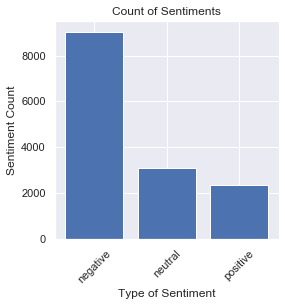

In [107]:
Index = [1,2,3]
sns.set()
plt.bar(Index,df_sentiment_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Sentiment Count')
plt.xlabel('Type of Sentiment')
plt.title('Count of Sentiments')

### Word Cloud for the negative Tweets:

In [108]:
#pip install wordcloud

In [109]:
from wordcloud import WordCloud,STOPWORDS

In [110]:
df.columns

Index(['processed_text', 'sentiment'], dtype='object')

In [111]:
plt.rcParams["figure.figsize"] = (4,4)

In [112]:
# df => word_df
# Tweet => df
##Checking the Negative Sentiments Word Cloud:
word_df=df[df['sentiment']== -1]
words = ' '.join(word_df['processed_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [113]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

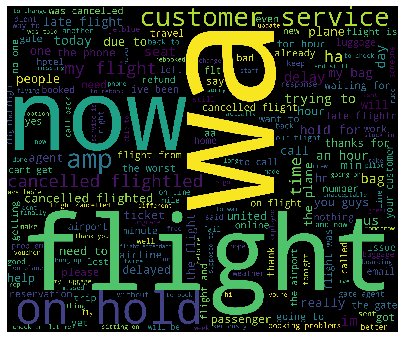

In [114]:
plt.figure(1,figsize=(7,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [115]:
#Checking the Positive Sentiments Word Cloud:
word_df_1=df[df['sentiment']== 1]
words_1 = ' '.join(word_df_1['processed_text'])
cleaned_word_1 = " ".join([word for word in words_1.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [116]:
wordcloud_1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_1)

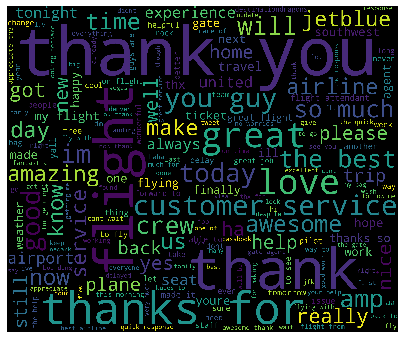

In [117]:
plt.figure(1,figsize=(7, 7))
plt.imshow(wordcloud_1)
plt.axis('off')
plt.show()

In [118]:
##Checking the Neutral Sentiments Word Cloud:
word_df_2=df[df['sentiment']== 0]
words_2 = ' '.join(word_df_2['processed_text'])
cleaned_word_2 = " ".join([word for word in words_2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [119]:
wordcloud_2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_2)

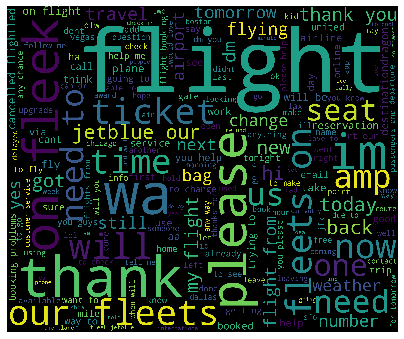

In [120]:
plt.figure(1,figsize=(7, 7))
plt.imshow(wordcloud_2)
plt.axis('off')
plt.show()

In [121]:
import seaborn as sns

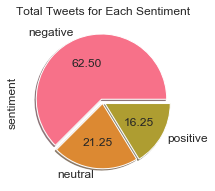

In [122]:
colors=sns.color_palette("husl", 10)
pd.Series(df["sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(3, 3),title = "Total Tweets for Each Sentiment")

In [123]:
#Removing '@' character:
df['processed_text']=df['processed_text'].replace({'@':''},regex=True)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
#Removing Emojis:
df=df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [125]:
df

,processed_text,sentiment
0,virginamerica what dhepburn said,0
1,virginamerica plus youve added commercials to ...,1
2,virginamerica i didnt today must mean i need t...,0
3,virginamerica its really aggressive to blast o...,-1
4,virginamerica and its a really big bad thing a...,-1
...,...,...
14488,americanair right on cue with the delays,-1
14489,americanair thank you we got on a different fl...,1
14490,americanair leaving over 20 minutes late fligh...,-1
14491,americanair please bring american airlines to ...,0


In [126]:
#Checking the Null values in Train Data:
df.isnull().values.any()

False

There are more negative reviews

The dataset has class imbalance problem. We can use the oversampling of minority classes (neutral and positive classes) in order to handle this problem.

In [127]:
lem = WordNetLemmatizer()
def stem_review(review):
    return ' '.join([lem.lemmatize(word) for word in review.split(' ')])
def normalize_text(dataframe):
    '''
    function used for rooting / stemming tokens
    '''
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda x : stem_review(x))

In [128]:
df.columns

Index(['processed_text', 'sentiment'], dtype='object')

In [129]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Text cleaning and preprocessing**

In [130]:
#To clean the data text from unwanted characters and spaces:
def clean_text(dataframe):
    '''
    function to clean tweets dataframe text , eg : remove white spaces , special chars and website urls
    '''
    # select nedded columns
    dataframe=dataframe[['processed_text','sentiment']]
    # drop nans
    dataframe=dataframe.dropna()
    # convert review into lower case
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda row : row.lower())
    # remove numbers
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda row : re.sub('\d+','',row))
    # remove tweet account name
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda row:re.sub(r'@\w+', '',row))
    # remove website urls
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda row:re.sub(r'http\S+', '',row))
    # rwmove special characters
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda row:re.sub(r"[^A-Za-z0-9']+", ' ',row))
    # remove white spaces
    dataframe['processed_text']=dataframe['processed_text'].apply(lambda row:re.sub(r'\s+', ' ',row))
    
    return dataframe


In [131]:
#traindf=clean_text(df)
clean_df=clean_text(df)

In [132]:
clean_df.shape

(14493, 2)

In [133]:
features_data=clean_df['processed_text']

In [134]:
features_data.shape

(14493,)

In [135]:
#convert text into numeric values using tf-idf vectorizer on entire Dataset:
tfidfconverter = TfidfVectorizer(
                                 min_df=5, 
                                 max_df=0.7,
                                 ngram_range=(1,2),
                                 stop_words='english'
                                )  
tfidfconverter.fit(features_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=5, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

**Transforming X_train & X_test data to a counter => Done later for**  
1) Training features only after doing their Augmentation first &   
2) Test features only without augmentation => to avoid data leakage


**Do not train on entire dataset of tf-idf now. first do Augmentation now & then predict**

In [136]:
#Splitting the data into 80% Training Data & 20% Testing Data
data_train,data_test = train_test_split(clean_df, test_size=.2)

In [137]:
data_train.head(5)

,processed_text,sentiment
9837,usairways and after six hours even the gate ag...,-1
9683,usairways americanair how is it possible that ...,-1
3756,united please help left my ipad air on my flig...,0
11778,americanair thx for responding i cant watch mi...,-1
4691,southwestair can you equip a with flamethrower...,0


In [138]:
data_train.shape

(11594, 2)

In [139]:
data_train['sentiment'].value_counts()

-1    7250
0     2470
1     1874
Name: sentiment, dtype: int64

In [140]:
data_test.head(5)

,processed_text,sentiment
3041,united hour delay misplaced bag poor communica...,-1
4221,united you better hold my flight to tucson jus...,-1
9246,usairways ill check it out when i get to the a...,1
10375,usairways need seat assignments for one leg of...,0
310,virginamerica missed my flight how does standb...,0


In [141]:
data_test.shape

(2899, 2)

In [142]:
data_test['sentiment'].value_counts()

-1    1808
0      610
1      481
Name: sentiment, dtype: int64

In [143]:
#Creating a new copy of data frame for train data:
traindf=data_train

In [144]:
traindf.shape

(11594, 2)

In [145]:
traindf

,processed_text,sentiment
9837,usairways and after six hours even the gate ag...,-1
9683,usairways americanair how is it possible that ...,-1
3756,united please help left my ipad air on my flig...,0
11778,americanair thx for responding i cant watch mi...,-1
4691,southwestair can you equip a with flamethrower...,0
...,...,...
9759,usairways hopefully your crappy service improv...,-1
557,united a measly ecertificate is not how you ap...,-1
588,united i just sent an email to customer care t...,-1
2520,united addair we hope you dont miss your conne...,0


In [146]:
normalize_text(traindf)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
traindf

,processed_text,sentiment
9837,usairways and after six hour even the gate age...,-1
9683,usairways americanair how is it possible that ...,-1
3756,united please help left my ipad air on my flig...,0
11778,americanair thx for responding i cant watch mi...,-1
4691,southwestair can you equip a with flamethrower...,0
...,...,...
9759,usairways hopefully your crappy service improv...,-1
557,united a measly ecertificate is not how you ap...,-1
588,united i just sent an email to customer care t...,-1
2520,united addair we hope you dont miss your conne...,0


In [148]:
traindf['sentiment'].value_counts()

-1    7250
0     2470
1     1874
Name: sentiment, dtype: int64

In [149]:
traindf.columns

Index(['processed_text', 'sentiment'], dtype='object')

**Text augmentation**

to solve class imbalance problem we shall augment/oversample minor classes

In [150]:
def augment_text(dataframe):
    '''
    function used to augment minor classes in tweets dataset
    '''
    augmented_df = pd.DataFrame(columns=['processed_text', 'sentiment'])
    augmentor=naw.SynonymAug(aug_p=0.5)
    #aug_sent={0:3, 1:4}
    aug_sent={'0':3,
             '1':4}
    for i in range(len(dataframe)):
        current_label=dataframe['sentiment'].iloc[i]
        if current_label in list(aug_sent.keys()):
            current_text=dataframe['processed_text'].iloc[i]
            for j in range(aug_sent[current_label]):
                text = augmentor.augment(current_text)
                label = current_label
                tempdf = pd.DataFrame(list(zip([text], [label])), columns=['processed_text', 'sentiment'])
                augmented_df = augmented_df.append(tempdf)
        else :
                text = dataframe['processed_text'].iloc[i]
                label = current_label
                tempdf = pd.DataFrame(list(zip([text], [label])), columns=['processed_text', 'sentiment'])
                augmented_df = augmented_df.append(tempdf)
    return augmented_df

In [151]:
#import nlpaug.augmenter.word as naw

In [152]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [153]:
augmented_traindf=augment_text(traindf)

**Text Representation**

i will use TfidfVectorizer for sentiment vectorization , from many experiments i have done before with sentiment/reviews datasets , below configuration gives good results

In [154]:
augmented_traindf

,processed_text,sentiment
0,usairways and after six hour even the gate age...,-1
0,usairways americanair how is it possible that ...,-1
0,united please help left my ipad air on my flig...,0
0,united please assistant leave my ipad air on m...,0
0,united please service left my ipad atmosphere ...,0
...,...,...
0,united i just sent an email to customer care t...,-1
0,united addair we desire you dont miss your ass...,0
0,united addair we trust you dont miss your asso...,0
0,joined addair we hope you dont miss your conne...,0


In [155]:
augmented_traindf['sentiment'].value_counts()

1     7496
0     7410
-1    7250
Name: sentiment, dtype: int64

In [156]:
df_sentiment_count1=augmented_traindf['sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Sentiments')

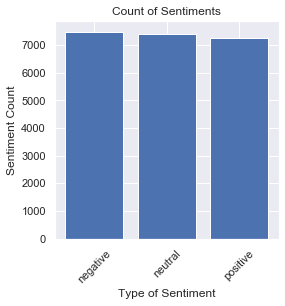

In [157]:
#Augmented Sampling:
Index = [1,2,3]
sns.set()
plt.bar(Index,df_sentiment_count1)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Sentiment Count')
plt.xlabel('Type of Sentiment')
plt.title('Count of Sentiments')

In [158]:
augmented_traindf

,processed_text,sentiment
0,usairways and after six hour even the gate age...,-1
0,usairways americanair how is it possible that ...,-1
0,united please help left my ipad air on my flig...,0
0,united please assistant leave my ipad air on m...,0
0,united please service left my ipad atmosphere ...,0
...,...,...
0,united i just sent an email to customer care t...,-1
0,united addair we desire you dont miss your ass...,0
0,united addair we trust you dont miss your asso...,0
0,joined addair we hope you dont miss your conne...,0


In [159]:
data_test

,processed_text,sentiment
3041,united hour delay misplaced bag poor communica...,-1
4221,united you better hold my flight to tucson jus...,-1
9246,usairways ill check it out when i get to the a...,1
10375,usairways need seat assignments for one leg of...,0
310,virginamerica missed my flight how does standb...,0
...,...,...
13904,americanair looks like i have best i can hope ...,-1
3355,united of the airplane otherwise they would ca...,-1
1031,united change made in just over hours for some...,-1
14316,americanair not sure why i would bother when t...,-1


In [160]:
#training data: augmented_traindf
#Testing data: data_test
#tfidfconverter => TF-IDF done on entire dataset

In [161]:
X_train = augmented_traindf['processed_text']
y_train = augmented_traindf['sentiment']
X_test = data_test['processed_text']
y_test = data_test['sentiment']

In [162]:
#tfidfconverter.fit(features_data) already done initially

# Transforming X_train & X_test data to a counter
X_train_tfidf = tfidfconverter.transform(X_train)
X_test_tfidf = tfidfconverter.transform(X_test)

In [163]:
X_train_tfidf.shape

(22156, 4647)

In [164]:
X_test_tfidf.shape

(2899, 4647)

We can see that the dimensions of the features in train & test are matching for number of columns in the data

In [165]:
text_classifier = RandomForestClassifier(n_estimators=400,n_jobs=-1,verbose=True)
text_classifier.fit(X_train_tfidf, y_train) #Using X & y from tfidfconverter function for training data only

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   26.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [166]:
#Model evaluation

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.1s finished


Classification Report :
               precision    recall  f1-score   support

          -1       0.84      0.79      0.81      1808
           0       0.46      0.57      0.51       610
           1       0.66      0.62      0.64       481

    accuracy                           0.71      2899
   macro avg       0.65      0.66      0.65      2899
weighted avg       0.73      0.71      0.72      2899
 
 Model Acurracy = 0.7126595377716454

 Confusion Matrix


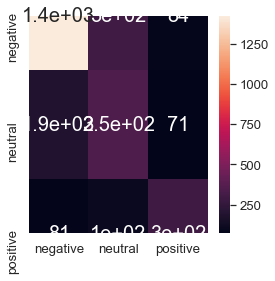

In [167]:
# model testing
predictions = text_classifier.predict(X_test_tfidf)
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(y_test,predictions),
                                                                 accuracy_score(y_test, predictions)))
# confusion matrix
print("\n Confusion Matrix")
df_cm = pd.DataFrame(confusion_matrix(y_test, predictions),['negative','neutral','positive'],['negative','neutral','positive'])
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20})

### Bernoulli Naive Bayes model:¶

In [168]:
X_train_NB = augmented_traindf['processed_text']
y_train_NB = augmented_traindf['sentiment']
X_test_NB =  data_test['processed_text']
y_test_NB = data_test['sentiment']

In [169]:
#Binary Representation of the Input features
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(X_train_NB)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [170]:
#To Transform our input features raw data using the vectorizer into a clean matrix (sparse matrix)
X_train_binary = binary_vectorizer.transform(X_train_NB)
X_test_binary = binary_vectorizer.transform(X_test_NB)

In [171]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli Naive Bayes Model Training:
model_nb = BernoulliNB()
model_nb.fit(X_train_binary, y_train_NB)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [172]:
#Predictig the accuracy on test dataset:

from sklearn import metrics
print ("Accuracy of Bernoulli Naive Bayes Model = %.3f " % (metrics.accuracy_score(model_nb.predict(X_test_binary),y_test_NB)*100))

Accuracy of Bernoulli Naive Bayes Model = 77.337 


### Using Non-Binary Count Vectorizer:

In [173]:
# Fit a counter
#CountVectorizer() is binary=False by default
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train_NB)

# Transform to counter
X_train_counts = count_vectorizer.transform(X_train_NB)
X_test_counts = count_vectorizer.transform(X_test_NB)

# Model Fitting:
model_counts = LogisticRegression(solver='liblinear', multi_class='auto')
model_counts.fit(X_train_counts, y_train_NB)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
print ( "Test Accuracy of the Non-Binary Count Vectorizer Model is = %.3f" % (metrics.accuracy_score(model_counts.predict(X_test_counts),y_test_NB)*100))

Test Accuracy of the Non-Binary Count Vectorizer Model is = 77.785


### Classification using Deep learning techniques:  

To train an embedding layer with Fully connected neural network

In [175]:
#training data: augmented_traindf
#Testing data: data_test
#tfidfconverter => TF-IDF done on entire dataset

In [176]:
features_data=clean_df['processed_text']

In [177]:
training_data = augmented_traindf['processed_text']

In [178]:
testing_data=data_test['processed_text']

In [179]:
tk = Tokenizer()

#fittting on entire data for just count only.
tk.fit_on_texts(features_data) 

#Transforming texts to sequences for both training data and testing data:
X_seq_train = tk.texts_to_sequences(training_data) #Balanced data through augmented_traindf
X_seq_test = tk.texts_to_sequences(testing_data) #testing data without any augmentation!(not required) => Data Leakage

#Performing padding to train & test data sets:
X_pad_train = pad_sequences(X_seq_train, maxlen=100, padding='post')
X_pad_test = pad_sequences(X_seq_test, maxlen=100, padding='post')

#Converting output labels into values (one hot encoding of categorical output variables)
ycat_train = pd.get_dummies(augmented_traindf['sentiment']).values
ycat_test = pd.get_dummies(data_test['sentiment']).values

In [180]:
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 100
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           426208    
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                102432    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51        
Total params: 529,219
Trainable params: 529,219
Non-trainable params: 0
_________________________________________________________________


In [181]:
history=model.fit(X_pad_train,ycat_train,validation_data=(X_pad_test,ycat_test),batch_size=32,epochs=4,verbose=True)

Train on 22156 samples, validate on 2899 samples
Epoch 1/4
22156/22156 [==============================] - 8s 362us/step - loss: 0.7999 - accuracy: 0.6347 - val_loss: 0.6556 - val_accuracy: 0.7440
Epoch 2/4
22156/22156 [==============================] - 8s 363us/step - loss: 0.4272 - accuracy: 0.8416 - val_loss: 0.5812 - val_accuracy: 0.7751
Epoch 3/4
22156/22156 [==============================] - 8s 354us/step - loss: 0.3249 - accuracy: 0.8822 - val_loss: 0.6277 - val_accuracy: 0.7682
Epoch 4/4
22156/22156 [==============================] - 8s 371us/step - loss: 0.2658 - accuracy: 0.9042 - val_loss: 0.6387 - val_accuracy: 0.7779


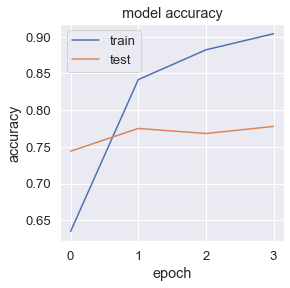

In [182]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Classification Report :
               precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1808
     neutral       0.63      0.51      0.57       610
    positive       0.72      0.66      0.69       481

    accuracy                           0.78      2899
   macro avg       0.73      0.69      0.70      2899
weighted avg       0.77      0.78      0.77      2899
 
 Model Acurracy = 0.7778544325629527

 Confusion Matrix


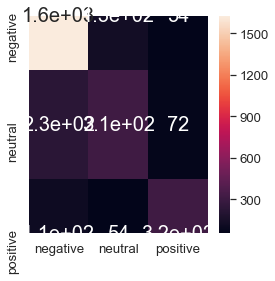

In [183]:
# model testing
predictions = [np.argmax(i) for i in model.predict(X_pad_test)]
ycat_test=[np.argmax(i) for i in ycat_test]
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(ycat_test,predictions,
                                                                                         target_names=['negative','neutral','positive']),
                                                                 accuracy_score(ycat_test, predictions)))
# confusion matrix
print("\n Confusion Matrix")
df_cm = pd.DataFrame(confusion_matrix(ycat_test, predictions),['negative','neutral','positive'],['negative','neutral','positive'])
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20})

### End of Project